<a href="https://colab.research.google.com/github/hufexv/Basic_python_code/blob/main/Computer_Vision_CV_5_face_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os

In [29]:
face_cascade = cv.CascadeClassifier('/content/haarcascade_frontalface_default .xml')
eye_cascade = cv.CascadeClassifier('/content/haarcascade_eye.xml')

In [30]:
if face_cascade.empty():
    print("Error: Cascade file not loaded correctly")


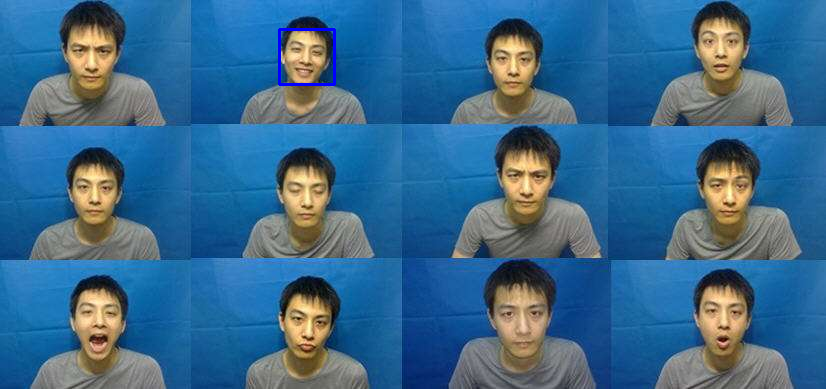

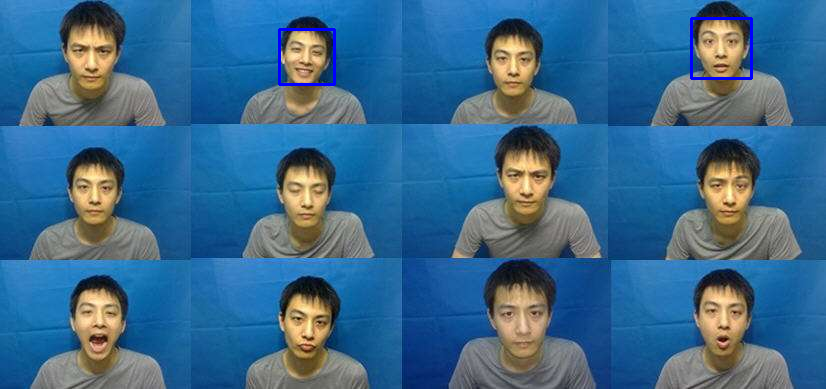

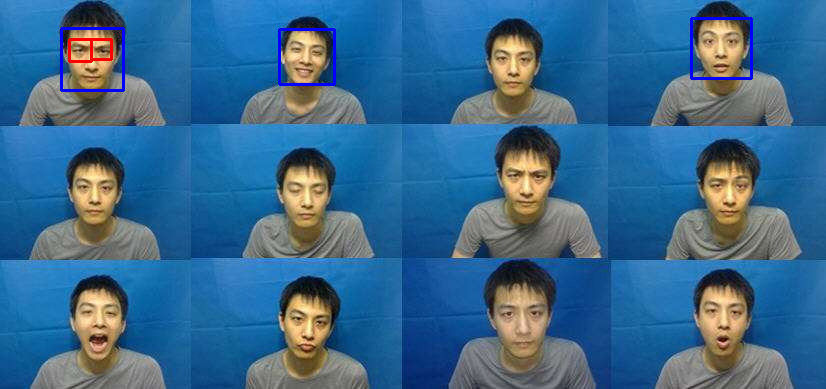

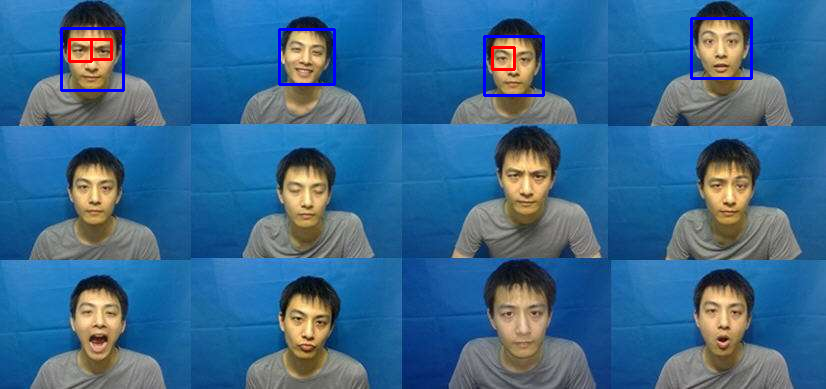

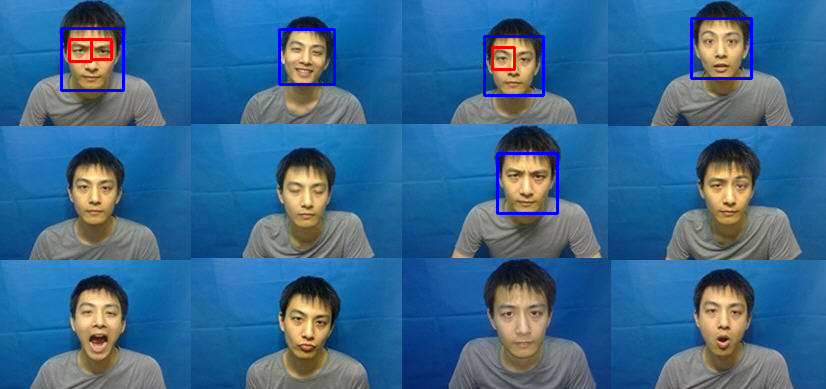

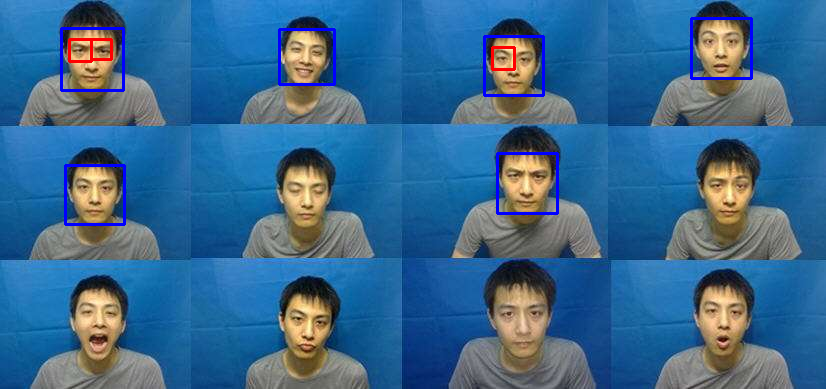

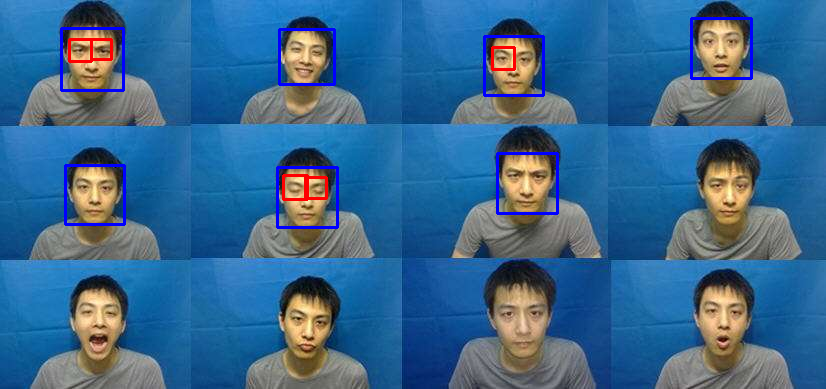

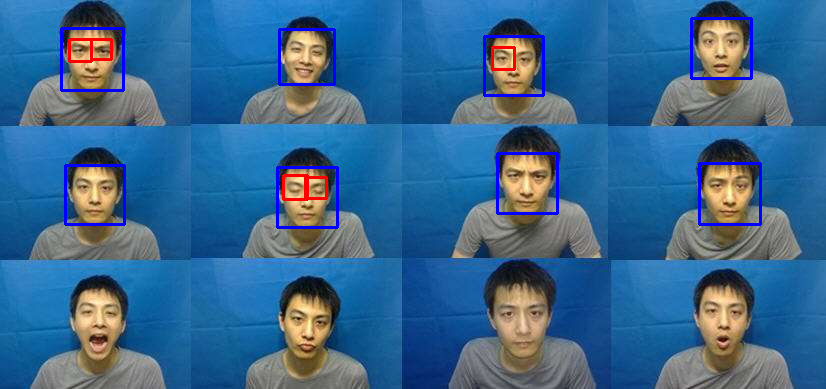

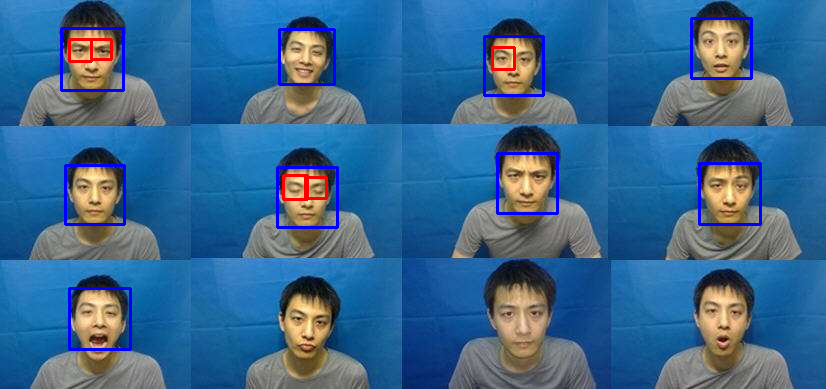

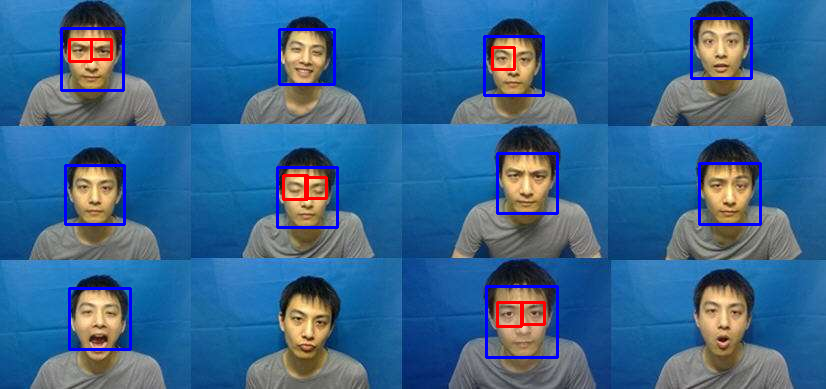

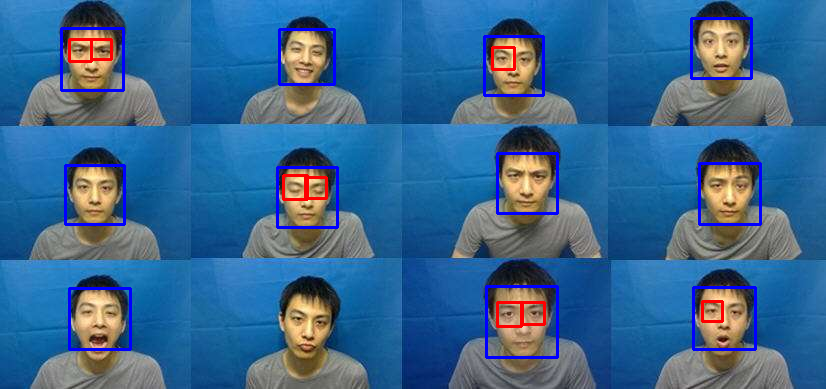

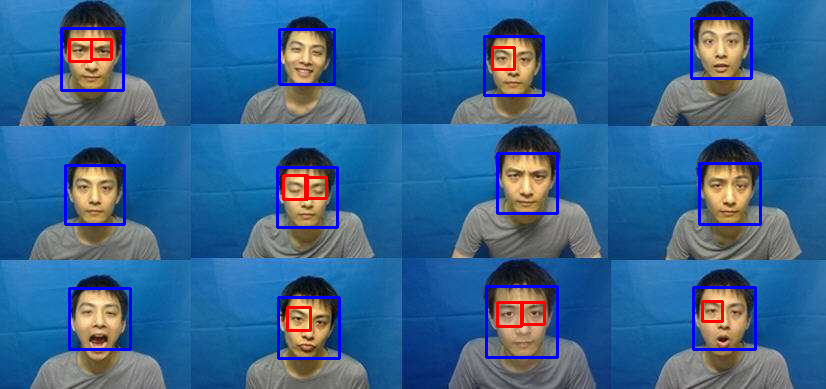

In [31]:
img = cv.imread('face.jpg')
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  #画人脸区域
  cv.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
  #获得人脸区域
  roi_gray = gray[y:y+h, x:x+w]
  roi_img = img[y:y+h, x:x+w]
  #检测眼睛
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    cv.rectangle(roi_img, (ex,ey), (ex+ew, ey+eh), (0,0,255), 2)

  cv2_imshow(img)

In [32]:
def face_detect_return_points(img):
    face_points = []
    eye_points = []

    # 转换为灰度图像
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    #
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)

    # 做一个人脸检测
    # 检测图像
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        # 画人脸区域
        face_points.append([x, y, x+w, y+h])
#         cv.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)

        # 获得人脸区域
        roi_gray = gray[y:y+h, x:x+w]
        roi_img = img[y:y+h, x:x+w]

        # 检测眼睛
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            # 画眼睛
            eye_points.append([ex+x, ey+y, ex+ew+x, ey+eh+y])
#             cv.rectangle(roi_img, (ex,ey), (ex+ew, ey+eh), (0,0,255), 2)
    return face_points, eye_points

def draw_rect(img, face_points, eye_points):
    for x1, y1, x2, y2 in face_points:
        cv.rectangle(img, (x1,y1), (x2, y2), (255,0,0), 2)

    for x1, y1, x2, y2 in eye_points:
        cv.rectangle(img, (x1,y1), (x2, y2), (0,0,255), 2)

    return img

global_face_points, globa_eye_points = [], []

def face_detect(img, flag=True):
    global global_face_points, globa_eye_points
    print(f"位置检测:{flag}")
    if flag:
        face_points, eye_points = face_detect_return_points(img)
        global_face_points = face_points
        globa_eye_points = eye_points

    return draw_rect(img, global_face_points, globa_eye_points)

位置检测:True


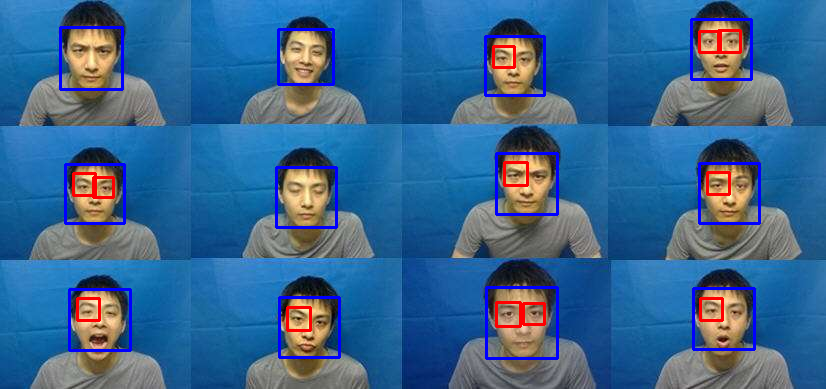

In [33]:
img = cv.imread('face.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(face_detect(img))